# Zomato Data Analysis

In [35]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading Data

Loading csv data into a pandas dataframe.

In [2]:
path = "zomato.csv"
zomato_df = pd.read_csv(path)
print('data shape', zomato_df.shape)
zomato_df.head()

data shape (51717, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Data Exploration and Preprocessing

In this section we have created various graphs and covariance matrices for understanding the data.

### Cleaning blank values

In [3]:
zomato_df = zomato_df.drop_duplicates(subset=['address','listed_in(type)','listed_in(city)'],keep=False);
zomato_df = zomato_df.dropna(inplace=False)
print('Cleaned data shape', zomato_df.shape)
zomato_df.head()

Cleaned data shape (21248, 17)


,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
# Remove rows with NEW as rating
zomato_df = zomato_df[zomato_df['rate'] != 'NEW']

#saving rating as a single float value
zomato_df['rate'] = zomato_df['rate'].apply(lambda x: float(x.split('/')[0])) 

### Graph of number of people who order online on Zomato

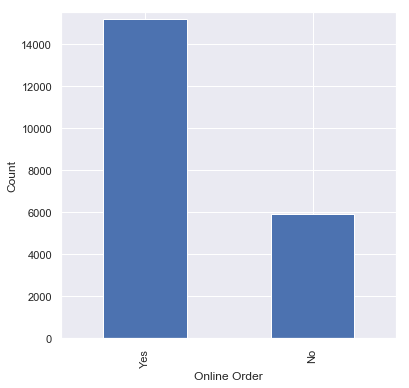

In [5]:
onlineOrderValueCount = zomato_df['online_order'].value_counts()
sns.set(rc={'figure.figsize':(6,6)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Count')
plt.xlabel('Online Order')
plt.show()

### Graph of customers who likes to do online reservations on Zomato

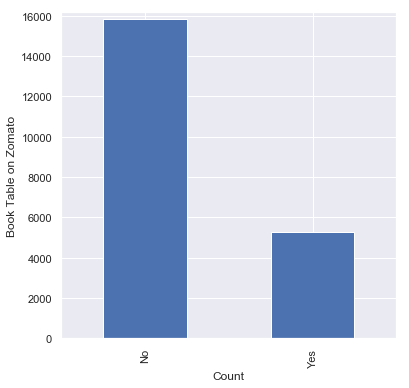

In [6]:
onlineOrderValueCount = zomato_df['book_table'].value_counts()
sns.set(rc={'figure.figsize':(6,6)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Book Table on Zomato')
plt.xlabel('Count')
plt.show()

### Graph of ratings of people vs count

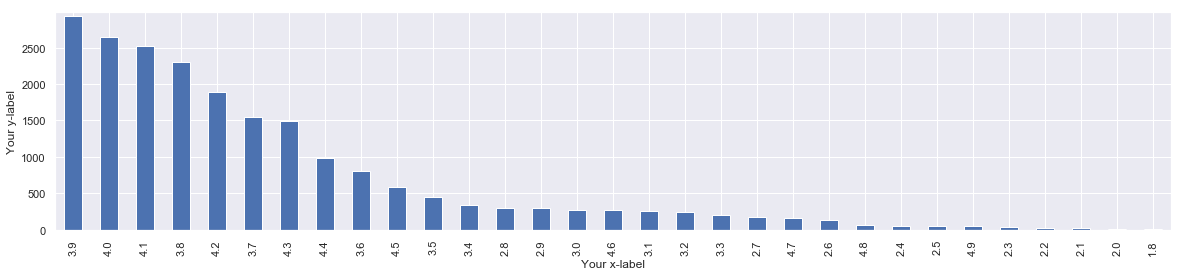

In [7]:
onlineOrderValueCount = zomato_df['rate'].value_counts()
sns.set(rc={'figure.figsize':(20,4)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Your y-label')
plt.xlabel('Your x-label')
plt.show()

### Graph of number of restaurants in a particular location

In [ ]:
onlineOrderValueCount = zomato_df['location'].value_counts()
sns.set(rc={'figure.figsize':(20,4)})
fig = onlineOrderValueCount.plot(kind='bar')
plt.margins(0.02)
plt.ylabel('Areas')
plt.xlabel('Number of restaurants')
plt.show()

## Neighbourhood with the highest ratings and its characteristics 

In [9]:
requiredColumns = ['location', 'rest_type', 'rate', 'cuisines', 'votes']
dataSetWithRatingsAndCities = pd.DataFrame(zomato_df[requiredColumns])

dataSetWithRatingsAndCities.head()

,location,rest_type,rate,cuisines,votes
0,Banashankari,Casual Dining,4.1,"North Indian, Mughlai, Chinese",775
1,Banashankari,Casual Dining,4.1,"Chinese, North Indian, Thai",787
2,Banashankari,"Cafe, Casual Dining",3.8,"Cafe, Mexican, Italian",918
3,Banashankari,Quick Bites,3.7,"South Indian, North Indian",88
4,Basavanagudi,Casual Dining,3.8,"North Indian, Rajasthani",166


### Calculating best overall rated location

In [10]:
meanRating = dataSetWithRatingsAndCities.groupby('location')['rate'].mean().sort_values(ascending=False)
best_rated_location = meanRating.keys()[0]
meanRating.head()

location
Lavelle Road             4.193410
Koramangala 5th Block    4.152875
St. Marks Road           4.140072
Cunningham Road          4.115232
Sankey Road              4.100000
Name: rate, dtype: float64

### Find all cuisines in best rated location

In [11]:
all_cuisines = []

dataSetWithRatingsAndCities[dataSetWithRatingsAndCities['location'] == best_rated_location]['cuisines'].apply(lambda x: all_cuisines.extend(x.split(', ')))
all_cuisines = list(set(all_cuisines)) # get unique cuisine values
print('All the cuisines served on top rating location are:', all_cuisines)

All the cuisines served on top rating location are: ['Rajasthani', 'Mughlai', 'Juices', 'Steak', 'Modern Indian', 'Finger Food', 'South Indian', 'Tex-Mex', 'Mexican', 'Japanese', 'North Indian', 'Italian', 'Thai', 'BBQ', 'Continental', 'Street Food', 'French', 'Spanish', 'Fast Food', 'Burger', 'European', 'Mediterranean', 'Beverages', 'Parsi', 'Kebab', 'Mangalorean', 'Sandwich', 'Ice Cream', 'Momos', 'Indonesian', 'Healthy Food', 'North Eastern', 'Asian', 'Desserts', 'Seafood', 'Chinese', 'Bakery', 'Salad', 'Pizza', 'Cafe']


### Find restaurant types in best rated location

In [12]:
all_rest_types = []
dataSetWithRatingsAndCities[dataSetWithRatingsAndCities['location'] == best_rated_location]['rest_type'].apply(lambda x: all_rest_types.extend(x.split(', ')))
all_rest_types = list(set(all_rest_types)) # get unique restaurant types only
print('All the restaurant types in top rating location are:', all_rest_types)

All the restaurant types in top rating location are: ['Bar', 'Dessert Parlor', 'Irani Cafee', 'Pub', 'Microbrewery', 'Casual Dining', 'Quick Bites', 'Lounge', 'Kiosk', 'Bakery', 'Fine Dining', 'Beverage Shop', 'Cafe']


# Predicting cost of two people in a restaurant

<b>Question :</b> Explain what is the task you’re solving (e.g., supervised x unsupervised, classification xregression x clustering or similarity matching x etc) ?<br>
<b>A:</b> Since the problem statement involves predicting the price of the 2 people in a particular restaurant, it is a supervised learning where we have a target variable i.e to predict the cost and all other parameters are the input variables. Since its a supervised learning it is a regression problem since we were trying to predict the value of cost. If we were given a value of cost and we had to predict if the predicted cost would be greater or less than any particualar value then it would be a classification problem

<b>Question :</b> What models will you choose? Why? <br>
<b>A:</b> Models used for this purpose would be Decision Tree Regressor, SVM Regressor and Linear Regressor.

In [13]:
X = zomato_df[['location', 'rate', 'rest_type', 'cuisines', 'approx_cost(for two people)']]
# Y = zomato_df['approx_cost(for two people)'].apply(lambda x: float(x.replace(',','')))
X[:20]

,location,rate,rest_type,cuisines,approx_cost(for two people)
0,Banashankari,4.1,Casual Dining,"North Indian, Mughlai, Chinese",800
1,Banashankari,4.1,Casual Dining,"Chinese, North Indian, Thai",800
2,Banashankari,3.8,"Cafe, Casual Dining","Cafe, Mexican, Italian",800
3,Banashankari,3.7,Quick Bites,"South Indian, North Indian",300
4,Basavanagudi,3.8,Casual Dining,"North Indian, Rajasthani",600
5,Basavanagudi,3.8,Casual Dining,North Indian,600
7,Banashankari,4.6,"Casual Dining, Cafe","Pizza, Cafe, Italian",600
8,Banashankari,4.0,Cafe,"Cafe, Italian, Continental",700
9,Banashankari,4.2,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550
10,Banashankari,4.1,Cafe,Cafe,500


In [14]:
all_cuisines = []
all_rest_types = []

X['cuisines'].apply(lambda x: all_cuisines.extend(x.split(', ')))
X['rest_type'].apply(lambda x: all_rest_types.extend(x.split(', ')))

all_cuisines = list(set(all_cuisines))
all_rest_types = list(set(all_rest_types))
print(len(all_cuisines), len(all_rest_types))

97 21


In [15]:
list_X = []

def strech_data(x):
    multiple_cuisines = x['cuisines'].split(', ')
    multiple_rest_types = x['rest_type'].split(', ')
    for cusine in multiple_cuisines:
        for rest_type in multiple_rest_types:
            x['cuisines'] = cusine
            x['rest_type'] = rest_type
            list_X.append(x.tolist())
    return None
X.apply(lambda x: strech_data(x), axis=1)
len(list_X)

73445

In [16]:
streched_data = pd.DataFrame.from_records(list_X, columns=X.columns)
streched_data.head()
le = preprocessing.LabelEncoder()
encoded_X = streched_data[['location', 'rest_type', 'cuisines']].apply(le.fit_transform)
encoded_X['rate'] = streched_data['rate']
Y = streched_data['approx_cost(for two people)'].apply(lambda x: float(x.replace(',','')))
encoded_X.shape

(73445, 4)

In [17]:
Y.shape

(73445,)

### Decision Tree Regressor

In [18]:
regressor = DecisionTreeRegressor(random_state = 0)
cross_val_score(regressor, encoded_X, Y, cv=10)

array([0.8563703 , 0.92503518, 0.88374885, 0.82110888, 0.63842316,
       0.94936136, 0.95565953, 0.88191765, 0.86921104, 0.79598398])

### State Vector Regressor

In [22]:
svr_grid_search.best_estimator_

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

### Linear Regressor

In [50]:
X_train, X_test, y_train, y_test =  train_test_split(encoded_X, Y, test_size=0.2, random_state=42)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)


regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('Train MSE:', (np.square(regr.predict(X_train) - y_train)).sum()/ 2*X_train.shape[0])
print('Test MSE:', (np.square(regr.predict(X_test) - y_test)).sum()/ 2*X_test.shape[0])

Train Shape: (58756, 4) (58756,)
Test Shape: (14689, 4) (14689,)
Train MSE: 315460677283066.7
Test MSE: 19614998581301.496


### Neural Network Regressor

In [ ]:
X_train, X_test, y_train, y_test =  train_test_split(encoded_X, Y, test_size=0.2, random_state=42)
print('Train Shape:', X_train.shape, y_train.shape)
print('Test Shape:', X_test.shape, y_test.shape)

param_grid = [
  {
      'solver': ['lbfgs','adam'],
      'alpha': [1e-5, 1e-3],
      'activation': ['tanh', 'relu'],
      'hidden_layer_sizes': [(200), (100, 40), (40,200),(300, 200)]
  }
]
mlp_grid_search = GridSearchCV(MLPRegressor(), param_grid, cv=5)
mlp_grid_search.fit(encoded_X[:10000], Y[:10000])

Train Shape: (58756, 4) (58756,)
Test Shape: (14689, 4) (14689,)


c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stoch

In [ ]:
mlp_grid_search..best_estimator_